# **RNN Introduction**


## Importing required libraries


In [4]:
!pip install mplfinance

In [5]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [6]:
df = pd.read_csv('/content/traffic.csv', parse_dates=['DateTime'])
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [7]:
df['DateTime'].sample(5)

,DateTime
18093,2016-03-25 21:00:00
37190,2016-09-29 14:00:00
39130,2016-12-19 10:00:00
21443,2016-08-12 11:00:00
31686,2016-02-13 06:00:00


## Visualization

<Axes: >

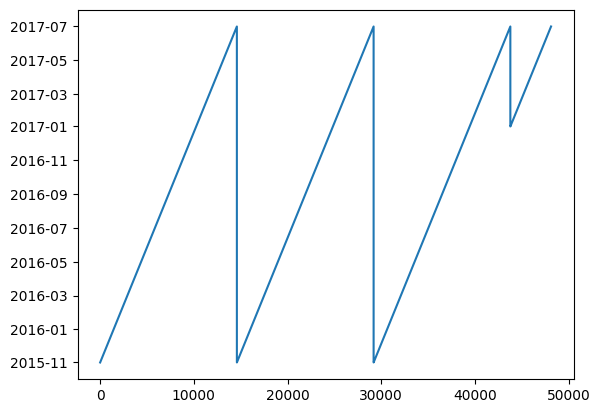

In [8]:
df['DateTime'].plot()

In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


<Axes: >

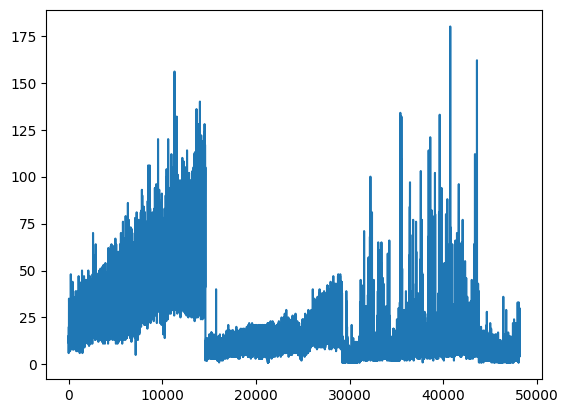

In [11]:
df['Vehicles'].plot()

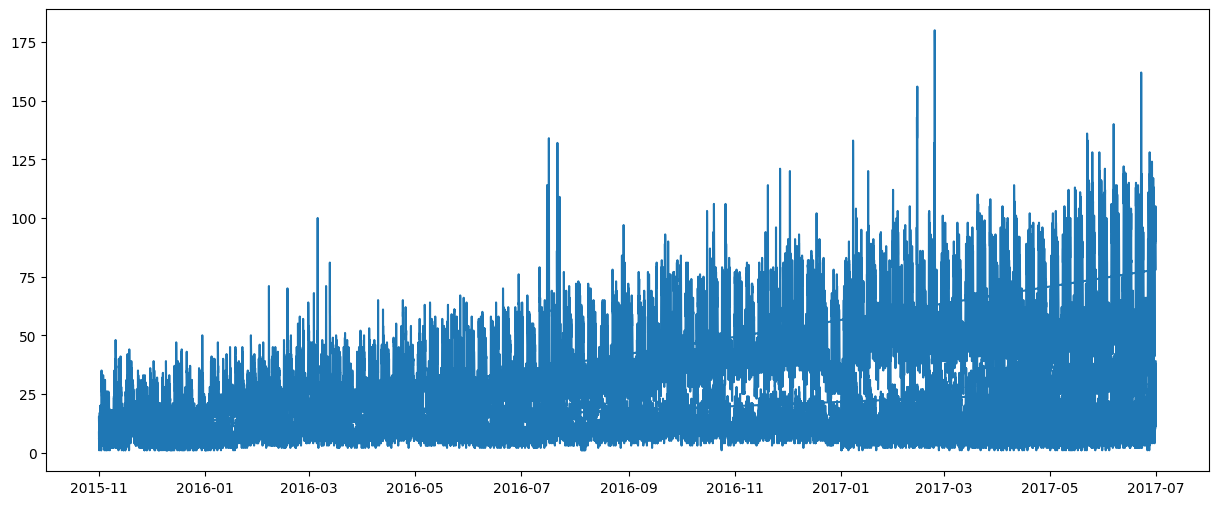

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], mark)

## Split the data into train and test

In [43]:
new_df = df.reset_index()['Vehicles']

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1, 1))

In [45]:
scaled_data

array([[0.07821229],
       [0.06703911],
       [0.05027933],
       ...,
       [0.08379888],
       [0.11731844],
       [0.06145251]])

In [46]:
train_size = int(len(scaled_data) * .8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [47]:
n_past = 60

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train)):
    X_train.append(train[i - n_past:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test)):
    X_test.append(test[i - n_past:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [48]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(38436, 60)
(38436,)


Testing set size:-
(9564, 60)
(9564,)


(None, None)

In [49]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Modeling


In [50]:
model = Sequential()

model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our RNN model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, callbacks= [checkpoints, early_stopping])

Epoch 1/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0644 - val_loss: 9.8440e-04
Epoch 2/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0026 - val_loss: 9.0987e-04
Epoch 3/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0013 - val_loss: 8.5832e-04
Epoch 5/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0011 - val_loss: 8.6095e-04
Epoch 6/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0010 - val_loss: 9.8868e-04
Epoch 7/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 9.1974e-04 - val_loss: 8.3443e-04
Epoch 8/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 9.1708e-04 - val_loss: 8.3947e-04
Epoch 9/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 8.1883e-04 - val_loss: 8.5085e-04
Epoch 10/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 8.2677e-04 - val_loss: 9.0481e-04
Epoch 11/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step -

## Visualization of results


In [54]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [55]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

31.894565282643367
15.60684216795817


In [57]:
new_df

,Vehicles
0,15
1,13
2,10
3,7
4,9
...,...
48115,11
48116,30
48117,16
48118,22


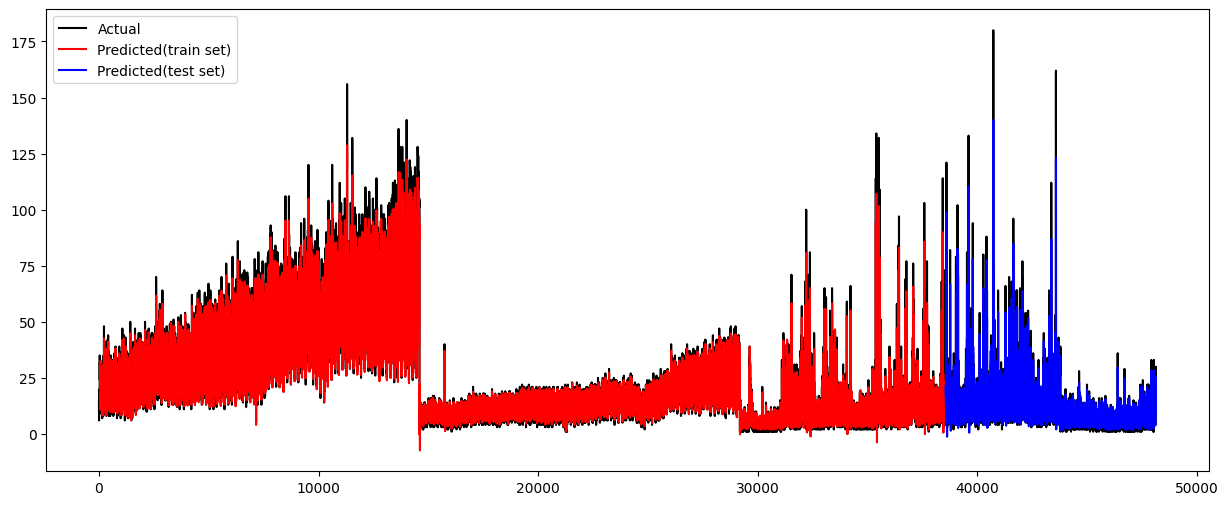

In [66]:
# Set the number of previous time steps to consider for plotting
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_df, dtype=float)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_df, dtype=float)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual")
plt.plot(trainPredictPlot, color='red', label=f"Predicted(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted(test set)")

plt.legend()
plt.show()